In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [26]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import *
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
font = {'size': 14}
matplotlib.rc('font', **font)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)


def plot3d(f,lim=(-5,5),title='Surface plot',detail=0.05,path=[],points=[]):
    fig = plt.figure(figsize=(16,12))
    ax = fig.add_subplot(111, projection='3d')
    xs = ys = np.arange(lim[0],lim[1], detail)
    X, Y = np.meshgrid(xs, ys)
    zs = np.array([f(x, y) for x, y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)
    surf = ax.plot_surface(X, Y, Z, cmap=cm.Blues)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    xlabel('X-axis');ylabel('Y-axis');ax.set_zlabel('Z-axis')
    plt.title(title);
    if len(path):
        xs, ys, zs = path[0], path[1], path[2]
        ax.plot(xs,ys,zs, 'o', color='r', markersize=5, zorder=3)
        for i in range(len(xs)-1):
            ax.add_artist(Arrow3D([xs[i], xs[(i+1)%len(xs)]],
            [ys[i], ys[(i+1)%len(xs)]],
            [zs[i], zs[(i+1)%len(xs)]],
            mutation_scale=15, lw=2, arrowstyle="-|>",
            color='r', zorder=4))
    if len(points):
        ax.plot(points[0], points[1], [f(x,y) for x, y in zip(points[0], points[1])], 'o', color='black', markersize=5, zorder=3)
    return fig, ax


NameError: name 'matplotlib' is not defined

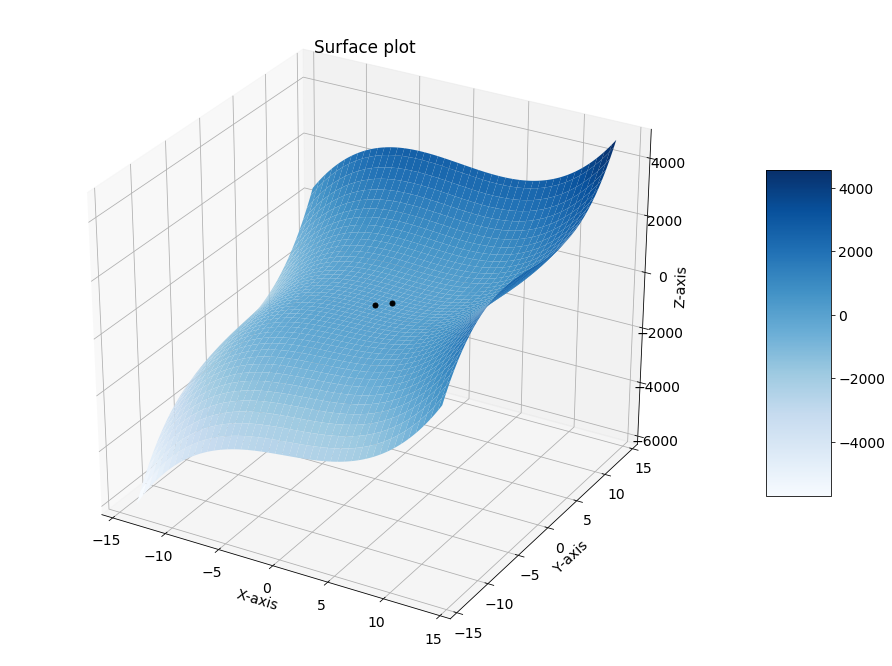

In [3]:
plot3d(lambda x,y: x**3 + y**3 - 3*x*y, lim=(-14,14), points=[[0,1], [0,1]], detail=.125);

(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x2734d653048>)

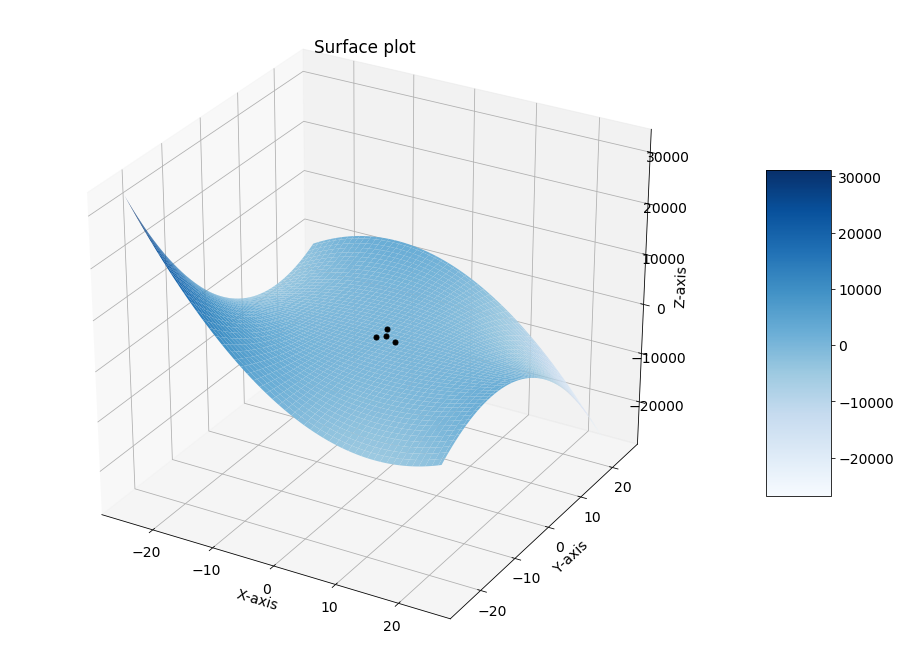

In [4]:
plot3d(lambda x,y: 3*x*y-x**2*y-x*y**2, lim=(-25,25), detail=0.5, points=[[0,3,0,1],[0,0,3,1]])

(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x2734d9be588>)

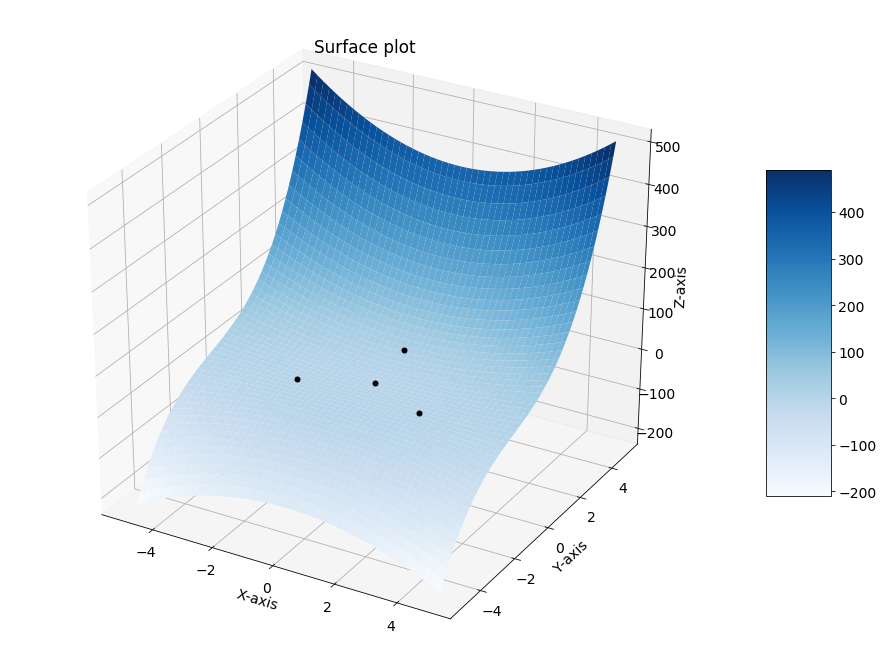

In [5]:
plot3d(lambda x,y: x**2+5*y**2+x**2*y+2*y**3, points=[[2,-2,0,0],[-1,-1,5/3,0]])

(<Figure size 1152x864 with 2 Axes>,
 <matplotlib.axes._subplots.Axes3DSubplot at 0x2734d63aa20>)

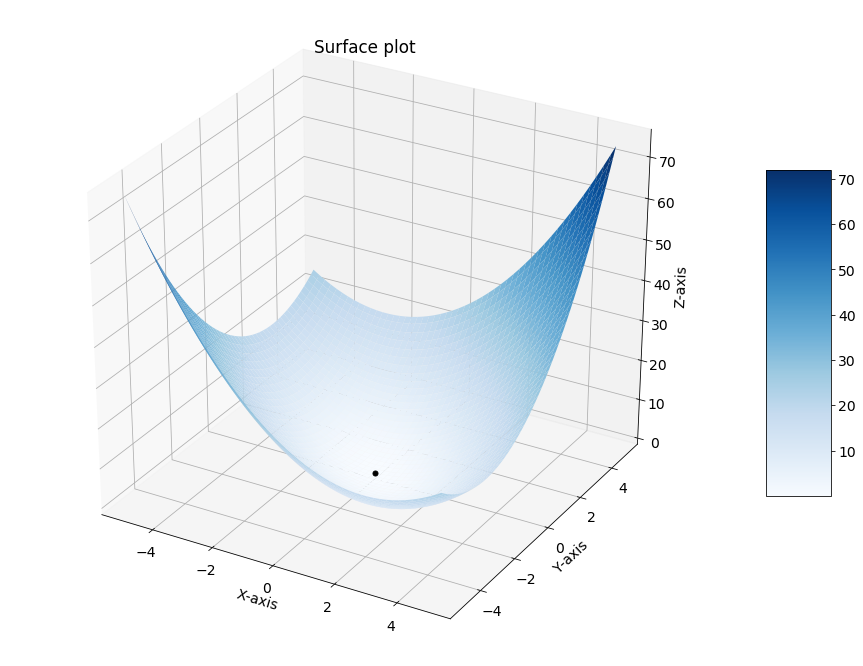

In [6]:
plot3d(lambda x,y: x**2 + x*y + y**2, points=[[0],[0]])

In [3]:
from matplotlib import cm

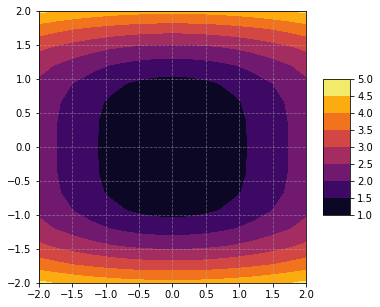

In [26]:
f = lambda x,y: sqrt(x**2 + y**4 + 1)

fig = plt.figure(figsize=(6,5))

xs = np.linspace(-2, 2, 16)
ys = np.linspace(-2, 2, 16)
X, Y = np.meshgrid(xs, ys)
zs = np.array([f(x,y) for x, y in zip(np.ravel(X), np.ravel(Y))])
Z = zs.reshape(X.shape)
            
ax = fig.add_subplot(111)
CS = ax.contourf(X, Y, Z, cmap=cm.inferno)
#plt.clabel(CS, fontsize=9, inline=1)
fig.colorbar(CS, shrink=0.5, aspect=5)
plt.grid(ls='dashed', alpha=.5)

In [3]:
from sympy import symbols, Matrix

c:\users\isomorphism\miniconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
c:\users\isomorphism\miniconda3\lib\site-packages\ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


Text(0.5, 1.0, 'Gradient of ...')

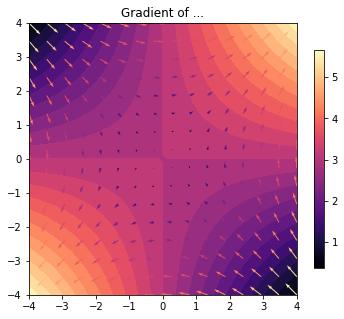

In [82]:
fig = plt.figure(figsize=(6,5))

f = lambda x,y: x * y

lim = [-4,4]
detail = 32
arrows = 2

x , y = symbols('x, y')
expr = f(x,y)
grad = Matrix([expr.diff(x), expr.diff(y)])
xs = np.linspace(lim[0], lim[1], detail)
ys = np.linspace(lim[0], lim[1], detail)
X, Y = np.meshgrid(xs, ys)
zs = np.array([expr.subs('x', x).subs('y', y).evalf() for x, y in zip(np.ravel(X), np.ravel(Y))]).astype('float')
Z = zs.reshape(X.shape)
cf = contourf(X,Y,Z,24, cmap=cm.magma)
xs = np.linspace(lim[0], lim[1], floor(detail/arrows))
ys = np.linspace(lim[0], lim[1], floor(detail/arrows))
X, Y = np.meshgrid(xs, ys)
dzs = np.array([grad.subs('x', x).subs('y', y).evalf() for x, y in zip(np.ravel(X), np.ravel(Y))]).astype('float')
dZx = [z[0] for z in dzs]
dZy = [z[1] for z in dzs]
dZz = [np.sqrt(np.dot(z,z)) for z in dzs]
quiv = quiver(X,Y,dZx,dZy,dZz,cmap=cm.magma)
plt.colorbar(quiv, shrink=0.8)
plt.title('Gradient of ...')

In [5]:
len(X)

24

In [64]:
grad.sub('x', 5)

AttributeError: 'list' object has no attribute 'sub'